# Эффективность флэшмоба в ленте новостей

Флэшмоб проходил с 02.12.2023 по 08.12.2023. Необходимо оценить эффективность мероприятия

Предположения, как изменятся некоторые метрики:
1) **DAU увеличится**: пользователи будут заходить на протяжении флэшмоба в приложение, чтобы опубликовать свой пост, чтобы следить за лайками своего поста и лайками других конкурсантов, а также будут просить своих знакомых зайти в приложение, чтобы пролайкали их пост; 
2) **Доля активной аудитории, котрая пользуется сервисом сообщений увеличится**: пользователи, которые учавствуют во флэшмобе будут пересылать своим друзьм опубликованные посты через сообщения, тем самым количество пользователей сервиса сообщений будет увеличиваться; 
3) **Дневной Retention (кол-во пользователей, которые были в прошлый и в текущий день) увеличится**: пользователям будет интересно следить за флешмобом и они скорее всего будут заходить каждый день, чтобы смотреть на каком месте находится их пост; 
4) **CTR увеличится**: флэшмоб должен спровоцировать пользователей больше лайкать, т.к. по лайкам будут определять победителя; 
5) **Среднее количество просмотров на одного пользователя в день увеличится**: во время флэшмоба будет много новых постов, пользователи будут их просматривать. И сами участники возможно будут просматривать посты других участников, чтобы определять кол-во лайков под их постами.

In [123]:
import pandas as pd
import pandahouse as ph

from causalimpact import CausalImpact
import tensorflow as tf
import tensorflow_probability as tfp

import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20231220'
}

In [125]:
def impact(df):
    df = df.set_index('date')
    pre_period = ['20231101', '20231202'] # период до события 01.11.2023-02.12.2023
    post_period = ['20231203', '20231208'] # период после события 03.12.2023-08.12.2023

    ci = CausalImpact(df, pre_period, post_period)
    return ci

### DAU

In [126]:
q = """
SELECT
    toDate(time) as date,
    count(distinct user_id) as dau
FROM simulator_20231220.feed_actions 
GROUP BY date
ORDER  BY date
"""
dau = ph.read_clickhouse(q, connection=connection)

In [127]:
ci_dau = impact(dau)

2023-12-29 11:54:27.579467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:54:27.597118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:54:27.979312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:

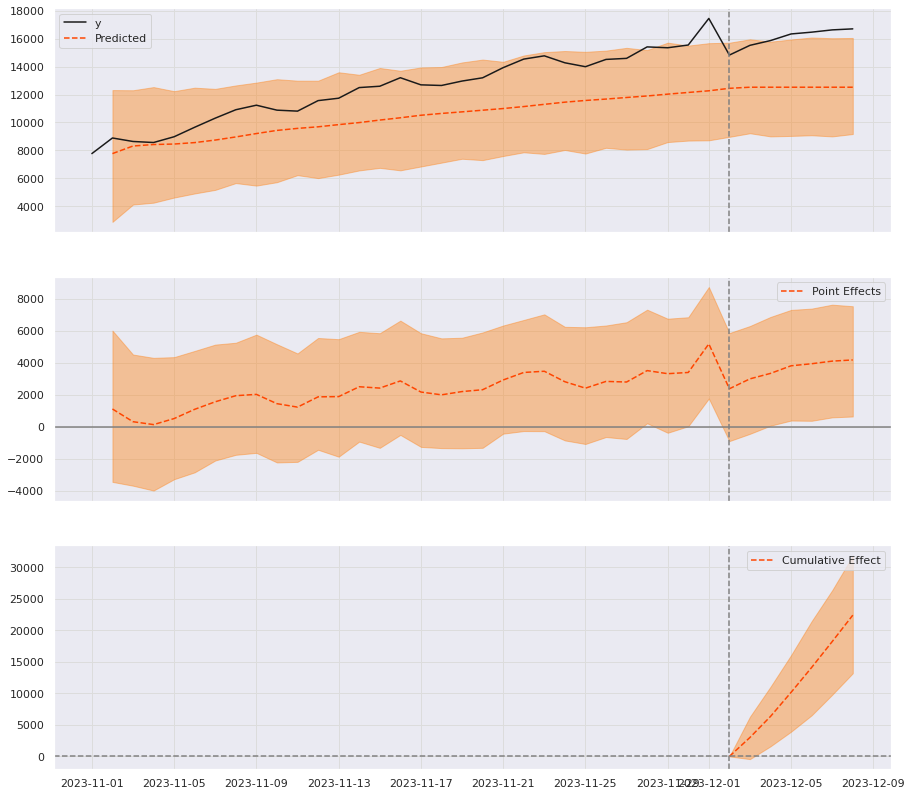

In [128]:
ci_dau.plot(figsize=(15, 14))

In [129]:
print(ci_dau.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16256.67           97540.0
Prediction (s.d.)         12526.4 (782.26)   75158.41 (4693.58)
95% CI                    [10988.52, 14054.93][65931.09, 84329.57]

Absolute effect (s.d.)    3730.26 (782.26)   22381.59 (4693.58)
95% CI                    [2201.74, 5268.15] [13210.43, 31608.91]

Relative effect (s.d.)    29.78% (6.24%)     29.78% (6.24%)
95% CI                    [17.58%, 42.06%]   [17.58%, 42.06%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


**DAU действительно увеличилось. Среднее значение DAU оказалось на 3748 больше, чем предсказанное, что составляет почти 30%.Но необходимо учесть тот факт, что до проведения флэшмоба 1.12.2023 была запущена реклама, которая в прошлом вызвала резкий скачок активной аудитории. Поэтому значимые результаты предсказаний скорее всего следствие этого события. И необходимо не забывать, что DAU имеет сезонность, которая в данной моделе не учитывается, а значит и результаты имеют неточности**

### Доля активной аудитории, котрая пользуется сервисом сообщений

In [130]:
q = """
SELECT
    toDate(time) as date,
    count(distinct user_id) as users_of_messege
FROM simulator_20231220.message_actions 
GROUP BY date
ORDER  BY date
"""
users_of_messege = ph.read_clickhouse(q, connection=connection)

In [131]:
users_of_messege = users_of_messege.set_index('date')

In [132]:
dau_1 = dau.set_index('date')

In [133]:
# Отношение количества пользователей, которые использовали сообщения к dau
users_mess_dau = pd.DataFrame(users_of_messege.users_of_messege/dau_1.dau).reset_index().rename(columns={0:'users_mess_dau'})

In [134]:
ci_users_mess_dau = impact(users_mess_dau)

2023-12-29 11:55:03.639276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:55:03.656615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:55:04.036609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:

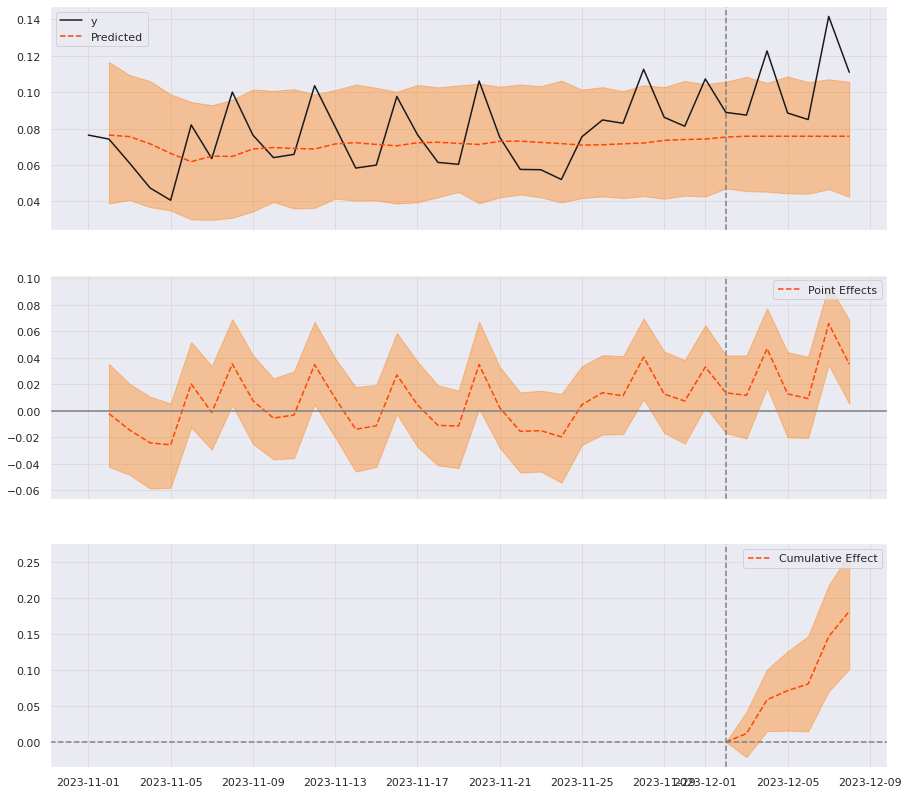

In [135]:
ci_users_mess_dau.plot(figsize=(15, 14))

In [136]:
 print(ci_users_mess_dau.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.11               0.64
Prediction (s.d.)         0.08 (0.01)        0.45 (0.04)
95% CI                    [0.06, 0.09]       [0.38, 0.53]

Absolute effect (s.d.)    0.03 (0.01)        0.18 (0.04)
95% CI                    [0.02, 0.04]       [0.1, 0.26]

Relative effect (s.d.)    39.89% (8.75%)     39.89% (8.75%)
95% CI                    [22.63%, 56.93%]   [22.63%, 56.93%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


**Доля активной аудитории, котрая пользуется сервисом сообщений, как и предполагалось увеличилась. Среднее значение по предсказываемой модели должно было быть 0.08, а оказалось на 0.11 и это больше на 40%. Такой положительный эффект является статистически значимым и вряд ли может быть вызван случайными колебаниями.**

### Дневной Retention

In [137]:
q = """
    SELECT
    this_day as date,
    count(distinct user_id) as retained
    FROM(
    SELECT user_id,
             groupUniqArray((toDate(time))) as days_visited,
             addDays(arrayJoin(days_visited), + 1) this_day,
             if(has(days_visited, this_day) = 1, 'retained', 'gone') as status
      FROM simulator_20231220.feed_actions
      group by user_id)
    WHERE status='retained'
    GROUP BY this_day
"""
retention = ph.read_clickhouse(q, connection=connection)

In [138]:
ci_retention = impact(retention)

2023-12-29 11:55:39.857092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:55:39.875290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:55:40.264781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:

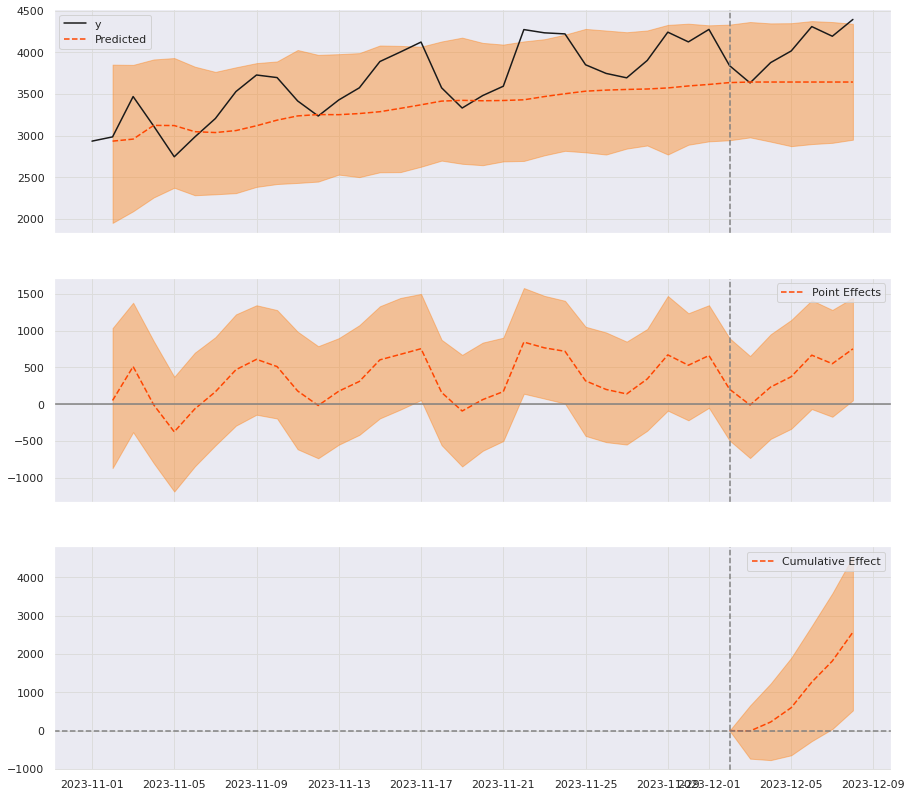

In [139]:
ci_retention.plot(figsize=(15, 14))

In [140]:
print(ci_retention.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    4071.17            24427.0
Prediction (s.d.)         3643.42 (161.56)   21860.53 (969.36)
95% CI                    [3346.17, 3979.47] [20076.99, 23876.8]

Absolute effect (s.d.)    427.74 (161.56)    2566.47 (969.36)
95% CI                    [91.7, 725.0]      [550.2, 4350.01]

Relative effect (s.d.)    11.74% (4.43%)     11.74% (4.43%)
95% CI                    [2.52%, 19.9%]     [2.52%, 19.9%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 99.2%

For more details run the command: print(impact.summary('report'))


**Средний дневной retention увеличился на 11,7%, это не так много по сравнению с прошлыми показателями, но тоже статистически значимо. Предполагалось, что среднее этой метрики будет 3644, а оказалось 4071**

### CTR

In [141]:
q = """
SELECT
    toDate(time) as date,
    countIf(action = 'like')/countIf(action = 'view') as ctr
FROM simulator_20231220.feed_actions 
GROUP BY date
ORDER  BY date
"""
ctr = ph.read_clickhouse(q, connection=connection)

In [142]:
ci_ctr = impact(ctr)

2023-12-29 11:56:05.536413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:56:05.553926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:56:06.540388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:

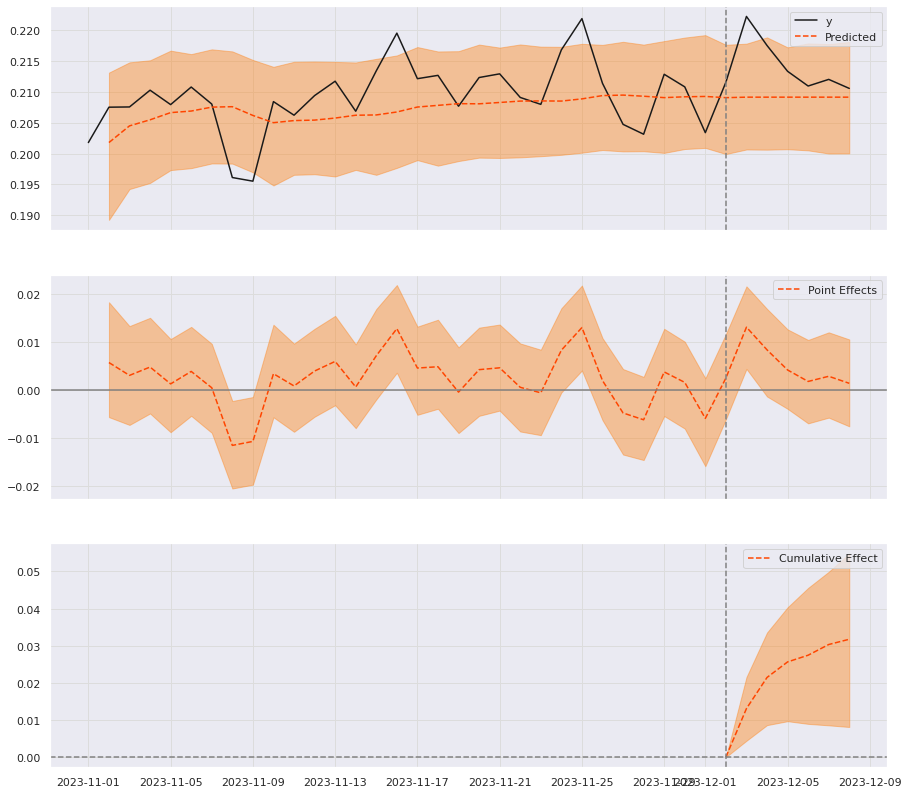

In [143]:
ci_ctr.plot(figsize=(15, 14))

In [144]:
print(ci_ctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.21               1.29
Prediction (s.d.)         0.21 (0.0)         1.25 (0.01)
95% CI                    [0.21, 0.21]       [1.23, 1.28]

Absolute effect (s.d.)    0.01 (0.0)         0.03 (0.01)
95% CI                    [0.0, 0.01]        [0.01, 0.05]

Relative effect (s.d.)    2.53% (0.9%)       2.53% (0.9%)
95% CI                    [0.76%, 4.29%]     [0.76%, 4.29%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.7%

For more details run the command: print(impact.summary('report'))


**По результатам данного предсказания сложно сравнить значения метрики ctr, т.к. изменения были на сотые и тысячные доли, но в относительном выражении изменение было на 2,5%  и для ctr это хороший результат. Вероятность случайного получения этого эффекта очень мала p=0.01.**

### Среднее количество просмотров на одного пользователя в день

In [145]:
q = """
SELECT
  date,
  sum(views) / count(user_id) as mean_views
FROM(
    SELECT
      toDate(time) as date,
      user_id,
      count(action) as views
    FROM
      simulator_20231220.feed_actions
    WHERE action = 'view'
    GROUP BY date, user_id
    ORDER BY date
  )
GROUP BY date
"""
mean_views = ph.read_clickhouse(q, connection=connection)

In [146]:
ci_mean_views = impact(mean_views)

2023-12-29 11:56:33.375164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:56:33.402109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:56:33.809349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2023-12-29 11:

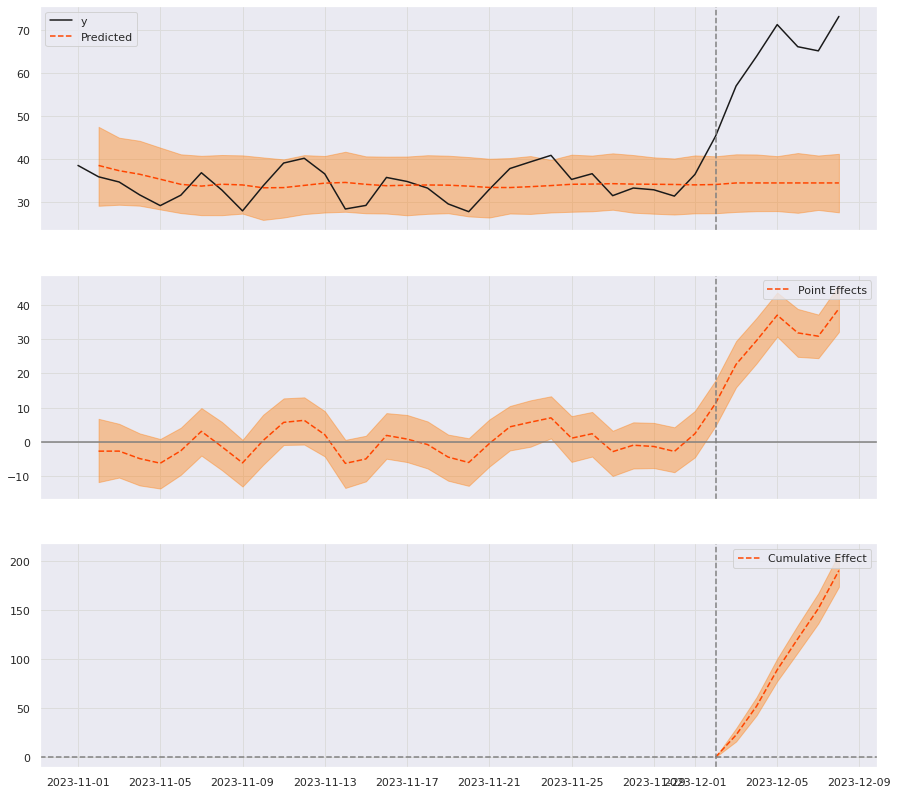

In [147]:
ci_mean_views.plot(figsize=(15, 14))

In [148]:
print(ci_mean_views.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    66.2               397.17
Prediction (s.d.)         34.44 (1.49)       206.66 (8.92)
95% CI                    [31.53, 37.36]     [189.2, 224.17]

Absolute effect (s.d.)    31.75 (1.49)       190.51 (8.92)
95% CI                    [28.83, 34.66]     [173.0, 207.97]

Relative effect (s.d.)    92.19% (4.32%)     92.19% (4.32%)
95% CI                    [83.71%, 100.64%]  [83.71%, 100.64%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


**Среднее количество просмотров на одного пользователя в день существенно возрасло, разница с предсказваемым значением составило примерно 92% (предсказывалось, что данная метрика будет составлять в среднем 34 человека, а получилось 66)**

### Выводы


[Text(0.5, 1.0, 'Среднее количество просмотров на одного пользователя в день до, во время и после проведения флэшмоба')]

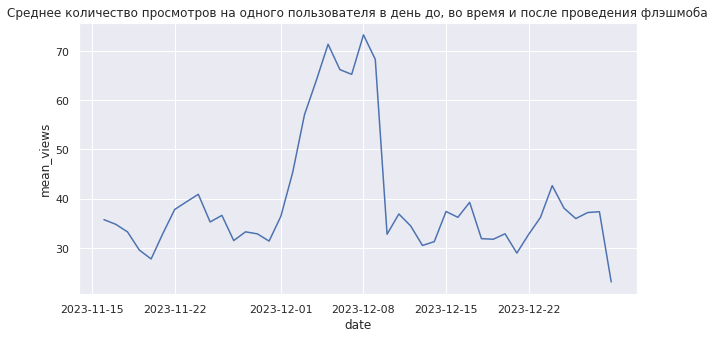

In [158]:
sns.set(rc={'figure.figsize':(10,5)})
mean_views_next = mean_views[mean_views['date']>"20231115"]
sns.lineplot(mean_views_next, x=mean_views_next['date'], y=mean_views_next['mean_views']). \
            set(title = 'Среднее количество просмотров на одного пользователя в день до, во время и после проведения флэшмоба')

[Text(0.5, 1.0, 'CTR до, во время и после проведения флэшмоба')]

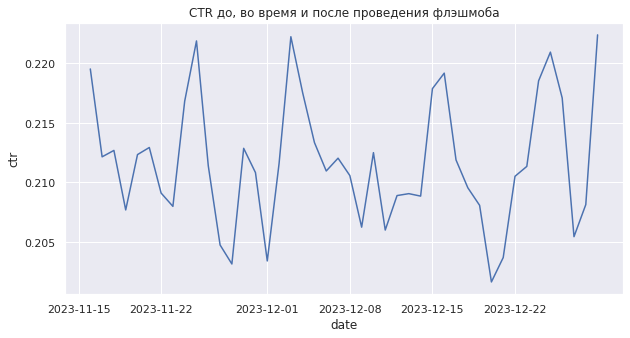

In [159]:
ctr_next = ctr[ctr['date']>"20231115"]
sns.lineplot(ctr_next, x=ctr_next['date'], y=ctr_next['ctr']). \
            set(title = 'CTR до, во время и после проведения флэшмоба')

[Text(0.5, 1.0, 'DAU до, во время и после проведения флэшмоба')]

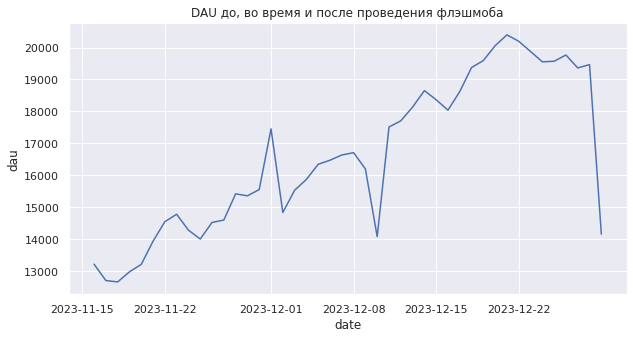

In [160]:
dau_next = dau[dau['date']>"20231115"]
sns.lineplot(dau_next, x=dau_next['date'], y=dau_next['dau']). \
            set(title = 'DAU до, во время и после проведения флэшмоба')

[Text(0.5, 1.0, 'Доля активной аудитории, котрая пользуется сервисом сообщений до, во время и после проведения флэшмоба')]

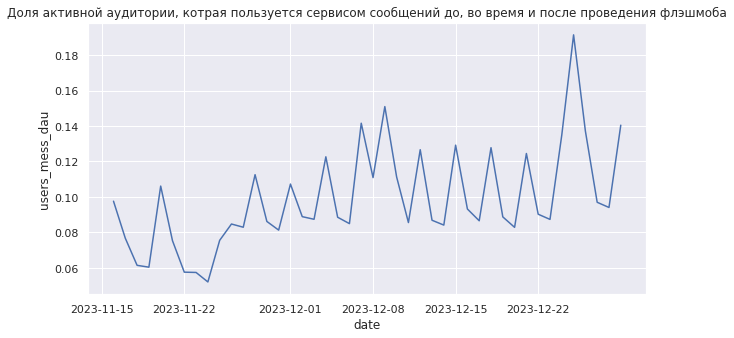

In [161]:
users_mess_dau_next = users_mess_dau[users_mess_dau['date']>"20231115"]
sns.lineplot(users_mess_dau_next, x=users_mess_dau_next['date'], y=users_mess_dau_next['users_mess_dau']). \
            set(title = 'Доля активной аудитории, котрая пользуется сервисом сообщений до, во время и после проведения флэшмоба')

[Text(0.5, 1.0, 'Дневной Retention до, во время и после проведения флэшмоба')]

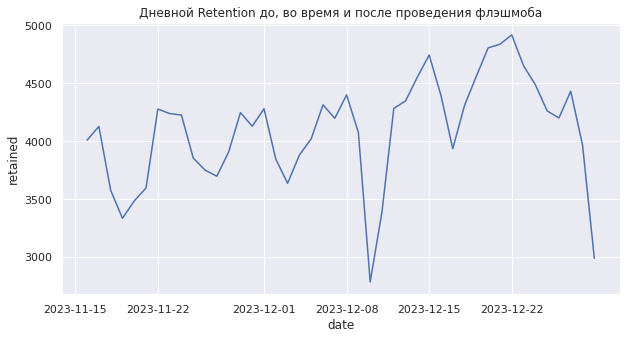

In [163]:
retention_next = retention[retention['date']>"20231115"]
sns.lineplot(retention_next, x=retention_next['date'], y=retention_next['retained']). \
            set(title = 'Дневной Retention до, во время и после проведения флэшмоба')

Во время флэшмоба среднее количество просмотров на одного пользователя выросло почти в два раза, но после окончания акции метрика вернулась к своему прежнему значению. У CTR во второй день флэшмоба был скачок, но постпенно он начал уменьшаться, возможно это связано с тем, что пользователи активно лайкали посты участников во второй день, а потом количество новых публикаций, участвующих во флэшмобе стало уменьшаться и у пользователей пропал запал, в целом такие скачки для ctr характерны, поэтому после проведения флэшмоба они появляются, но не являются эффектом данной акции. DAU в дни проведения флэшмоба имеет более пологий характер, чем в остальное время и после окончания флэшмоба виден резкий спад, поэтому можно сказать. что долгосрочного эффекта тоже не имеет. Доля активной аудитории, котрая пользуется сервисом сообщений возрасла к концу проведения флэшмоба из-за того что dau сам по себе в эти дни был меньше, но после окончания можно заметить, что эта метрика стала иметь стабильный периодический характер и ее значения больше, чем до флэшмоба. Дневной Retention рос на протяжении всей акции и потерпел резкий спад сразу после окончания. Это может быть связано с тем, что часть пользователей изо дня в день заходили в приложение, чтобы следить именно за флэшмобом. Сложно сказать, что дальнейший рост дневного retention связан именно с флэшмобом. \
Таким образом, можно сделать вывод, флэшмоб не имел долгосрочного эффекта в целом, но в каких-то метриках оказал положительный эффект.